In [1]:
import warnings
warnings.simplefilter("ignore")
import joblib

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from math import sqrt
import scipy.stats as stats
from scipy.stats import zscore

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [3]:
data_df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/abalone.csv')

In [4]:
data_df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


<b>Exploratory Data Analysis (EDA)</b>

In [5]:
data_df.shape

(4177, 9)

In [6]:
data_df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [7]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [8]:
data_df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [9]:
data_df.skew()

Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
dtype: float64

<b>Visualization</b>

<b>Count plot</b>

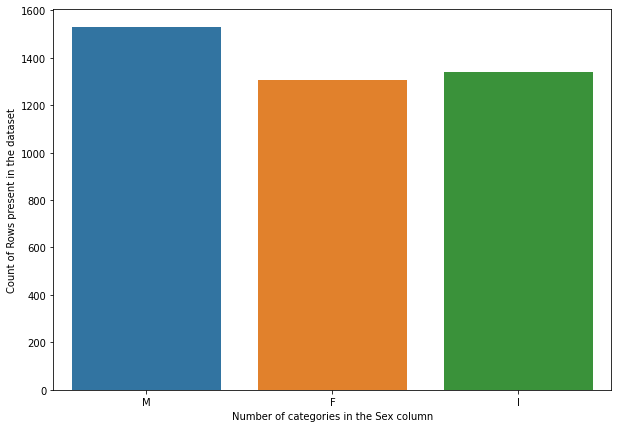

In [10]:
plt.figure(figsize=(10,7))
sns.countplot(x ='Sex', data = data_df)
plt.xlabel('Number of categories in the Sex column')
plt.ylabel('Count of Rows present in the dataset')
plt.show()

<b>Bar Plot</b>

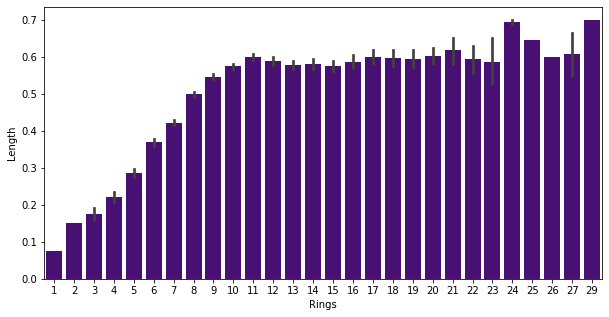

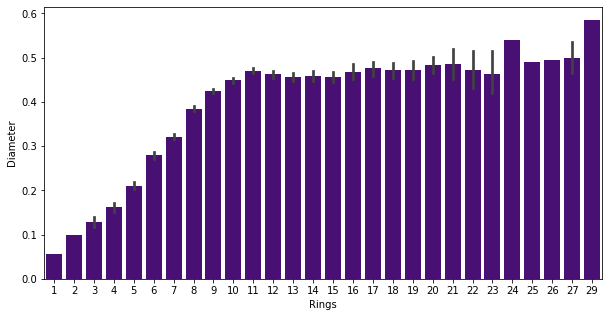

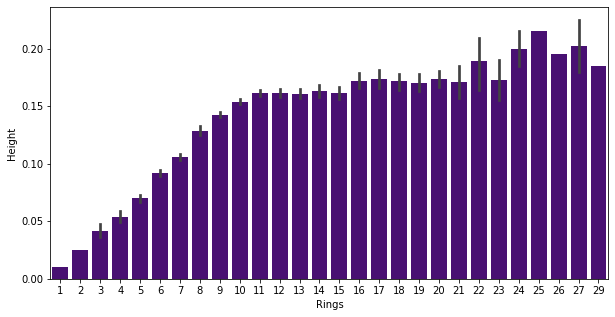

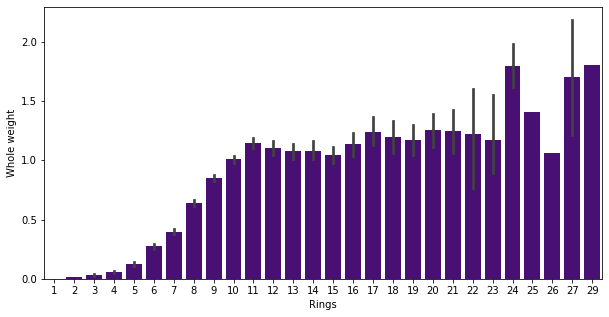

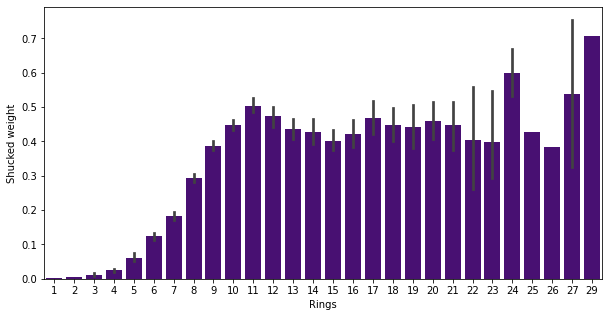

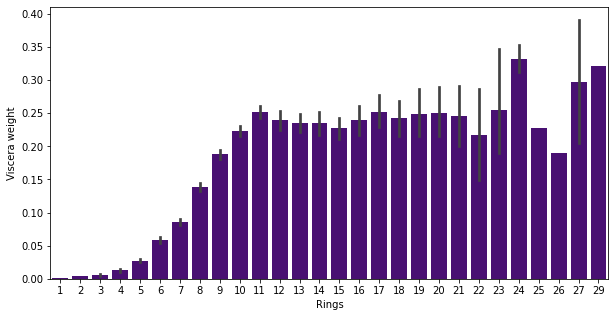

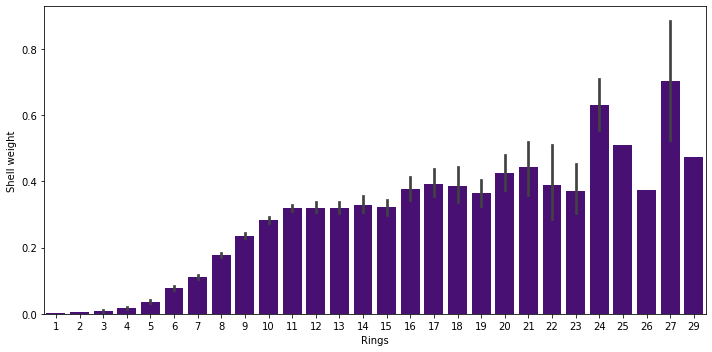

In [11]:
index=0
labels = data_df['Rings']
features = data_df.drop(['Rings', 'Sex'], axis=1)

for col in features.items():
    plt.figure(figsize=(10,5))
    sns.barplot(x=labels, y=col[index], data=data_df, color="indigo")
plt.tight_layout()
plt.show()


<b>Box plot</b>

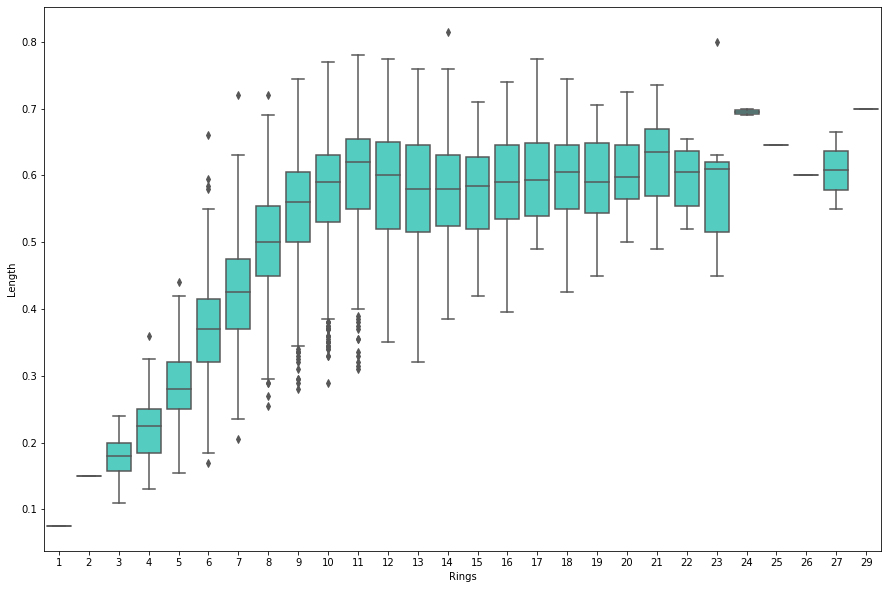

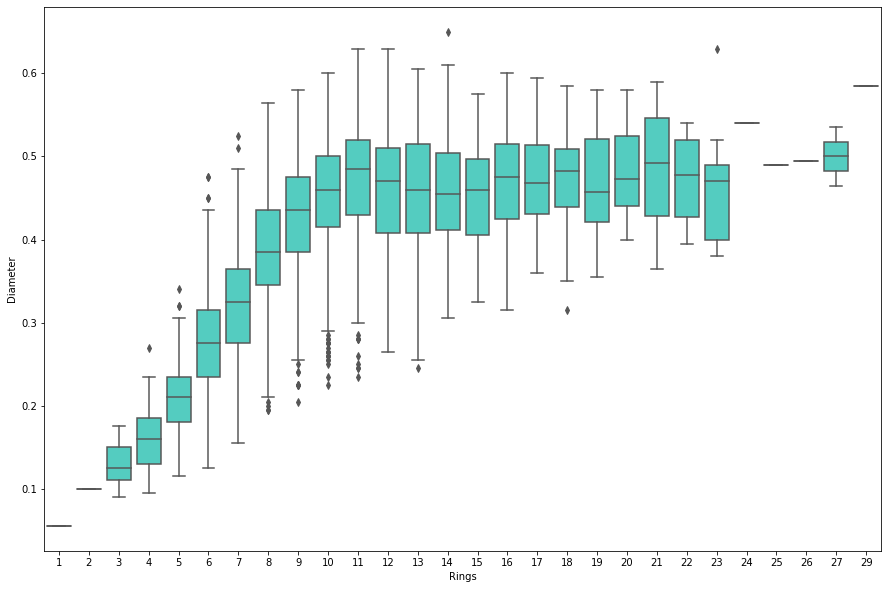

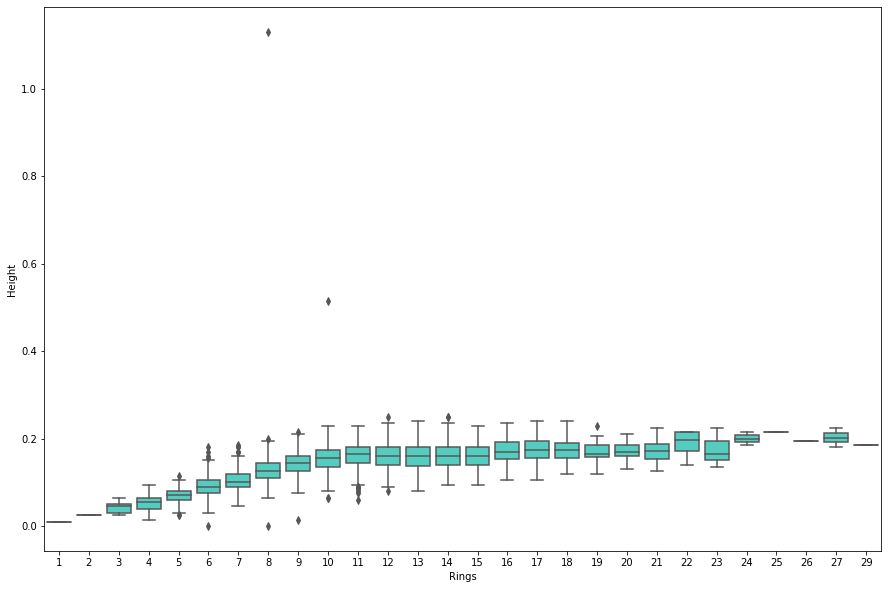

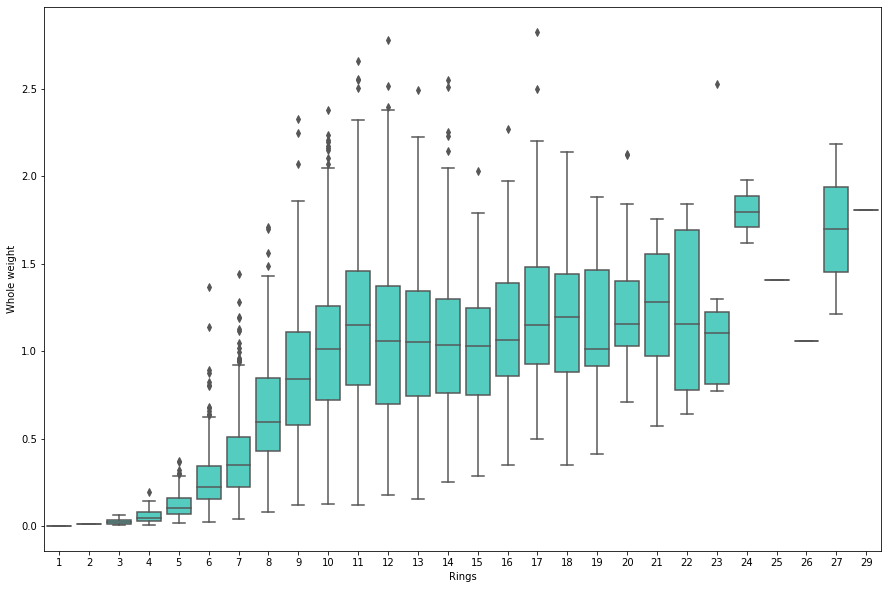

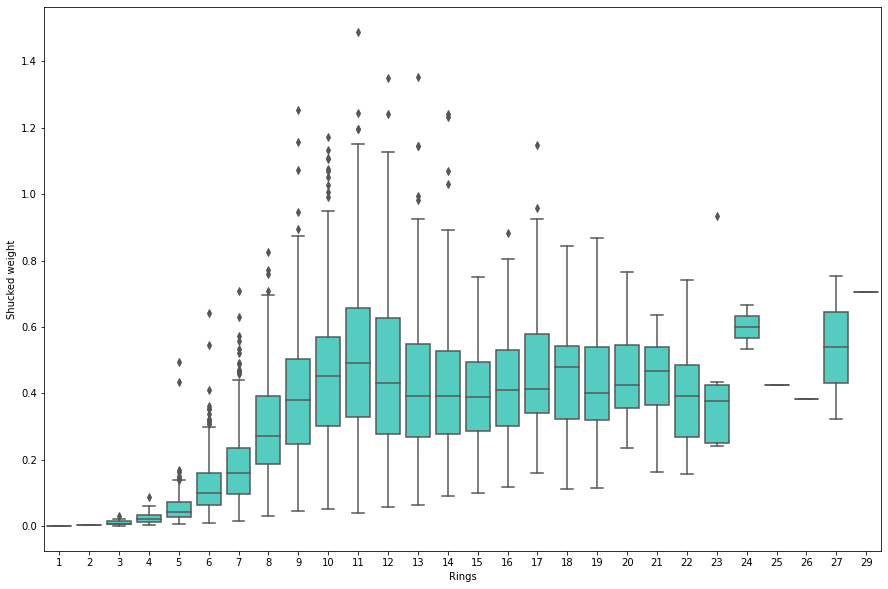

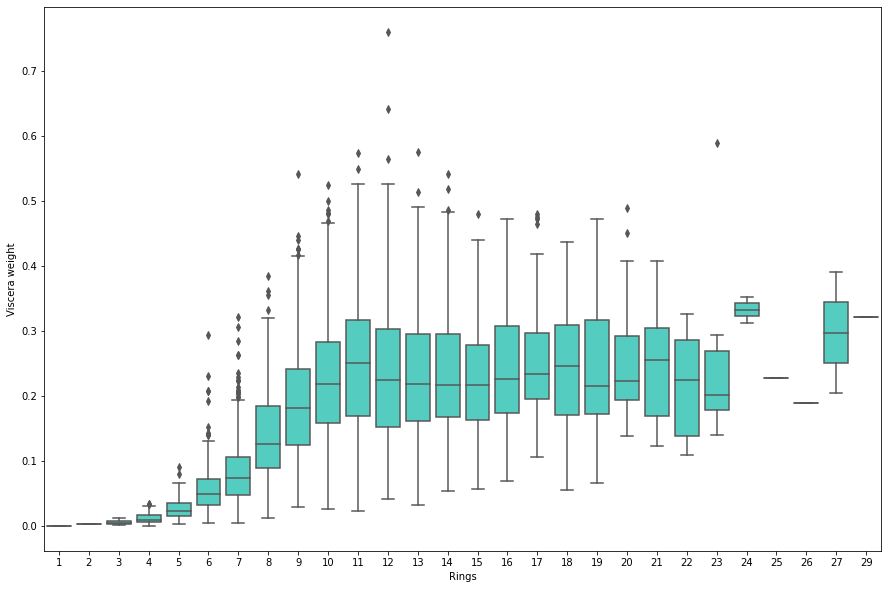

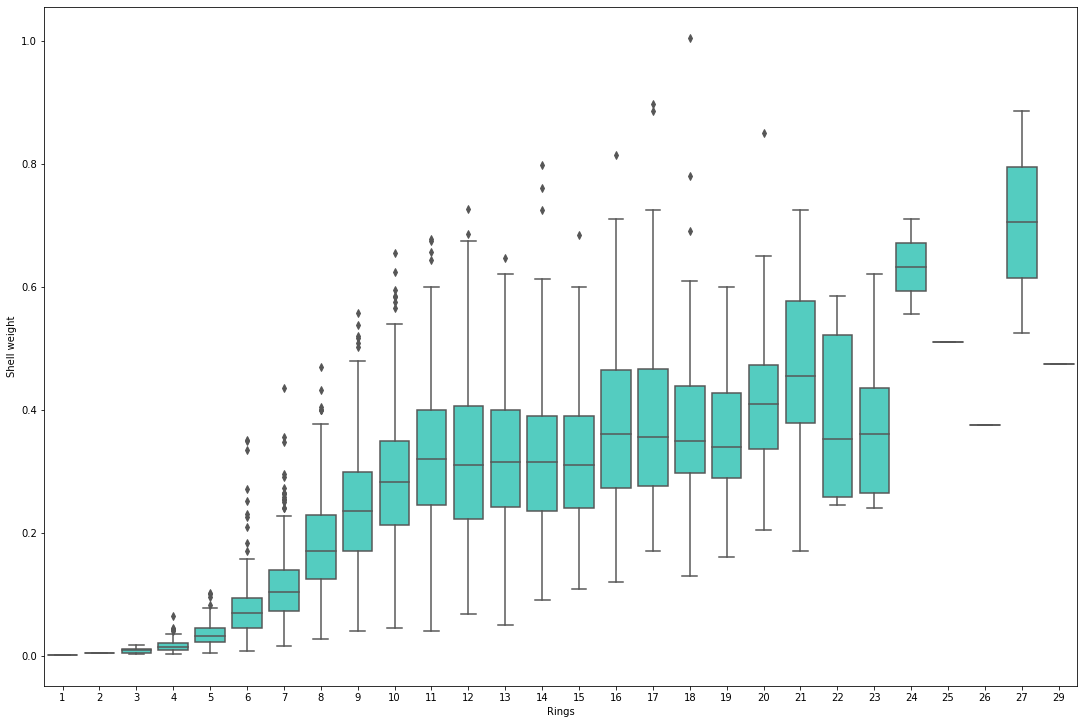

In [12]:
index = 0
for col in features.items():
    plt.figure(figsize=(15,10))
    sns.boxplot(x=labels, y=col[index], data=data_df, color="turquoise")
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)
plt.show()

<b>Distribution plot</b>

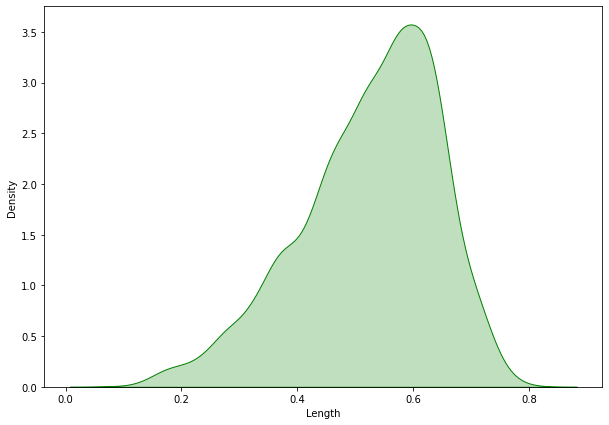

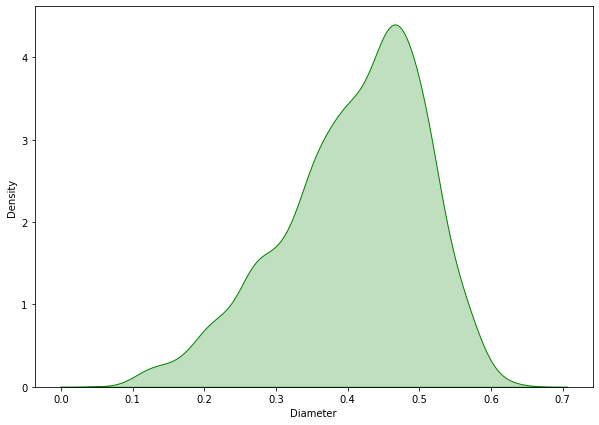

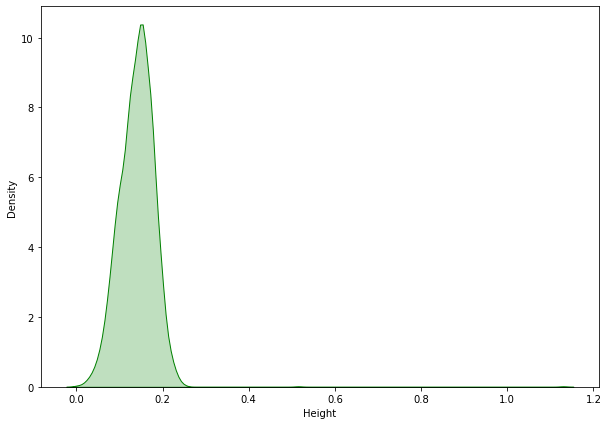

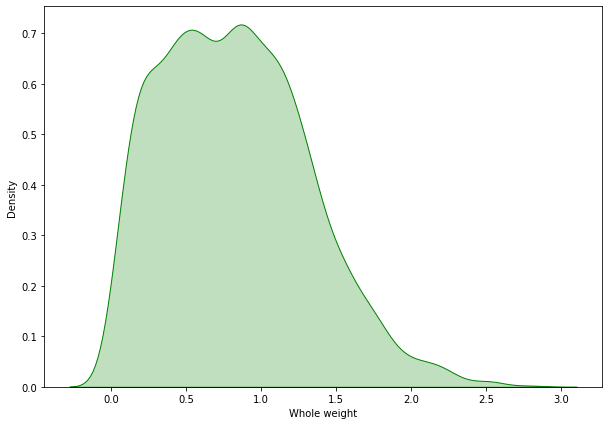

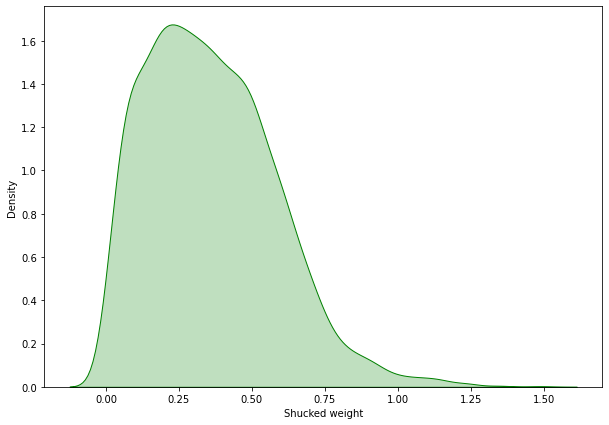

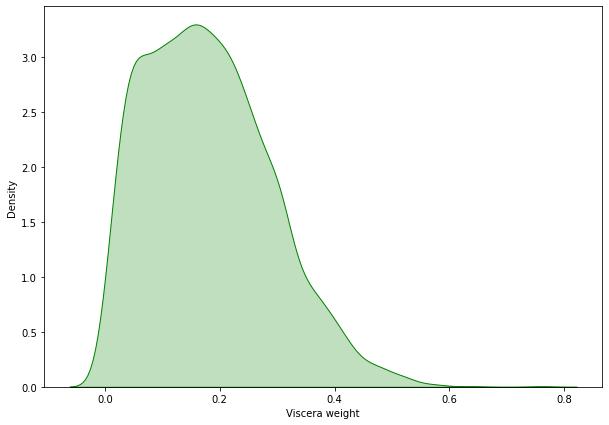

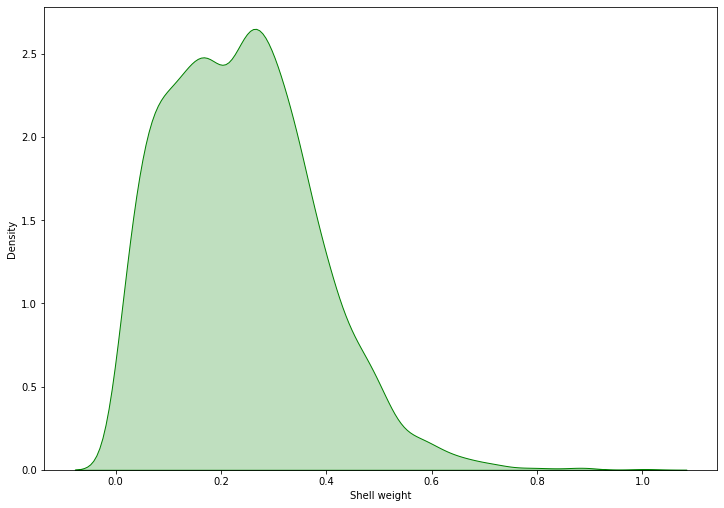

In [13]:
for col, value in features.items():
    plt.figure(figsize=(10,7))
    sns.distplot(value, hist=False, color="g", kde_kws={"shade": True})
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)
plt.show()

<b>Pair plot</b>

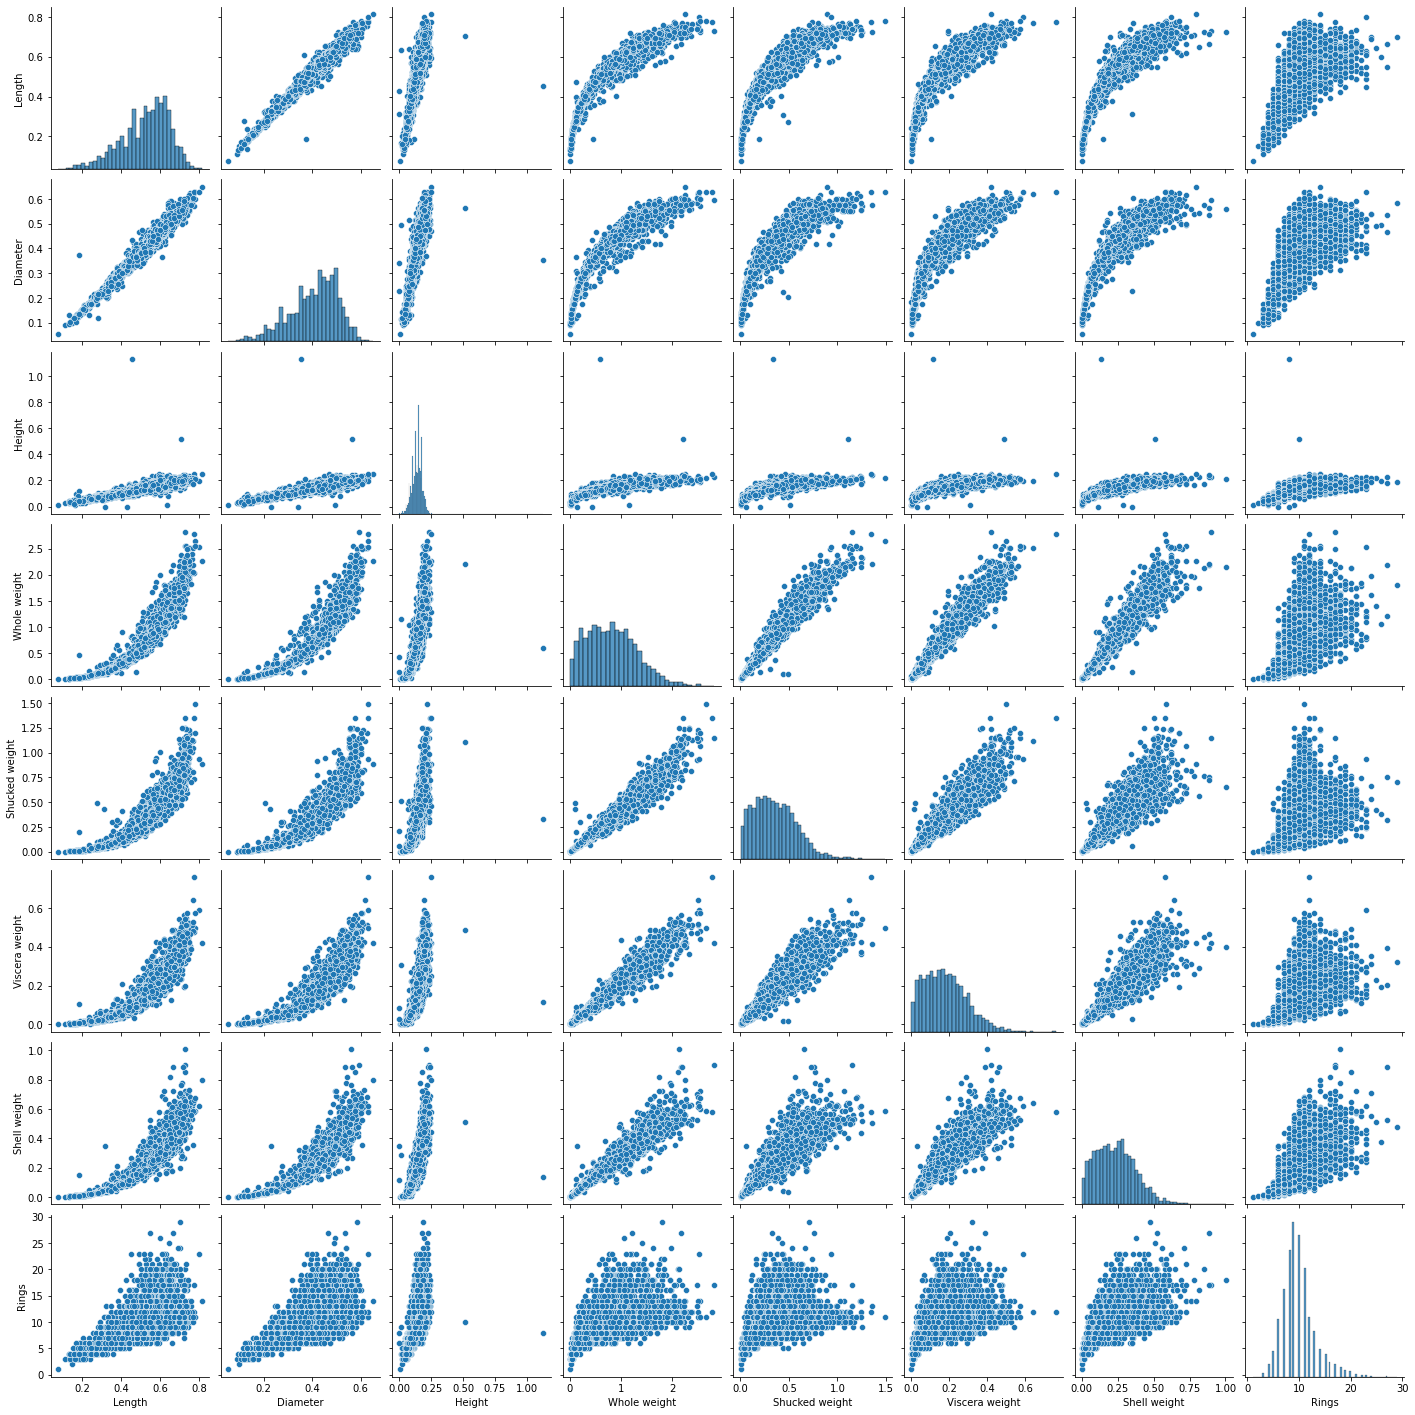

In [14]:
sns.pairplot(data_df)
plt.show()

<b>Histogram</b>

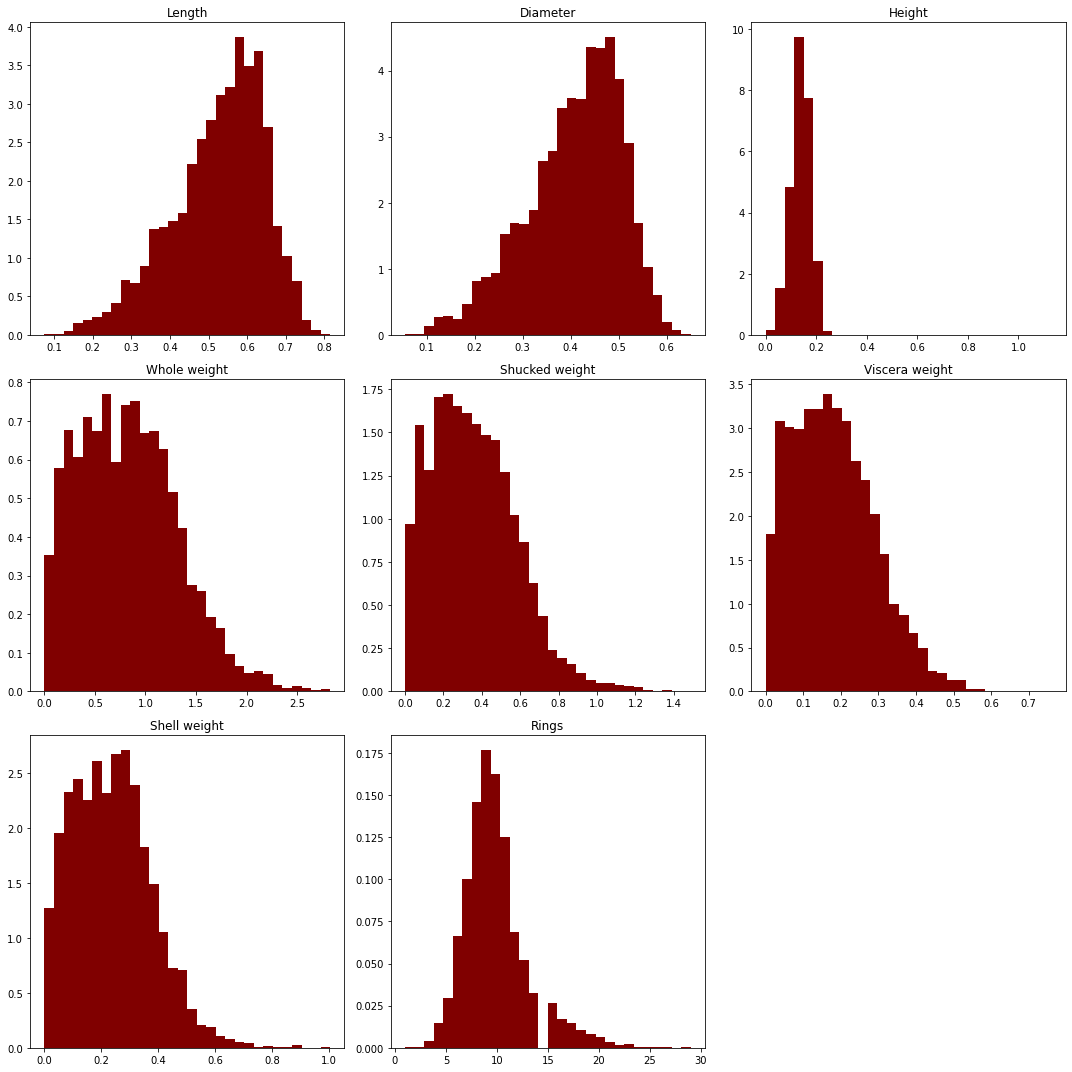

In [15]:
plt.rcParams['figure.figsize'] = (15,15)
data_df.hist(bins=30, color='maroon', density=True, label='Value', histtype='stepfilled', grid=False)
plt.tight_layout()
plt.show()

<b>Correlation using a Heatmap</b>

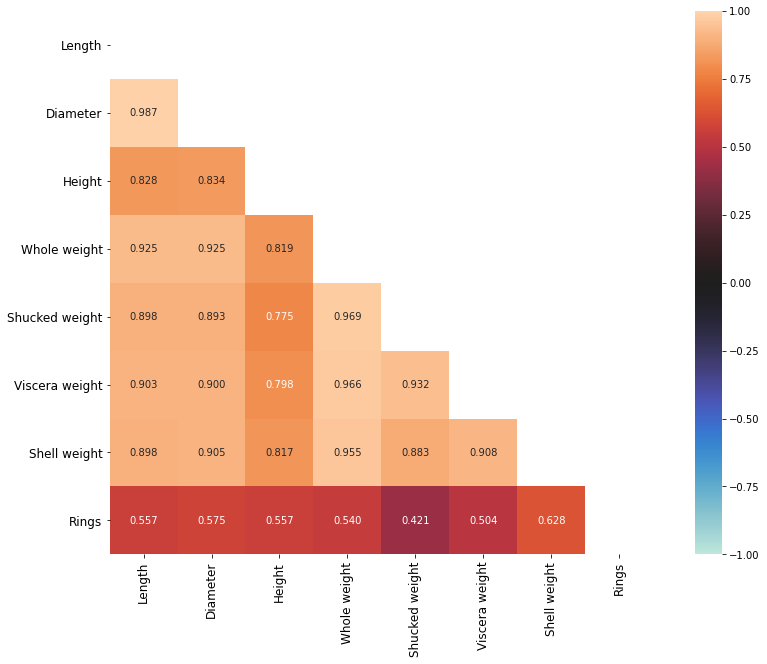

In [16]:
upper_triangle = np.triu(data_df.corr())
plt.figure(figsize=(15,10))
sns.heatmap(data_df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="icefire", mask=upper_triangle)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

<b>Encoding</b>

In [17]:
data_df = pd.get_dummies(data_df)
data_df

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,1,0,0
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,0,0,1
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,0,0,1
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,1,0,0


<b>Outlier removal</b>

In [18]:
data_df.shape

(4177, 11)

In [19]:
z=np.abs(zscore(data_df))
threshold=3
np.where(z>3)

data_df=data_df[(z<3).all(axis=1)]
data_df

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,1,0,0
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,0,0,1
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,0,0,1
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,1,0,0


In [20]:
data_df.shape

(4027, 11)

In [21]:
data_loss=(4177-4027)/4177*100 
data_loss

3.5910940866650707

<b>Splitting the dataset into 2 variables namely 'X' and 'Y' for feature and label</b>

In [22]:
X = data_df.drop('Rings', axis=1)
Y = data_df['Rings']

<b>Variance Inflation Factor(VIF)</b>

In [23]:
vif_data = pd.DataFrame()
vif_data["Features"]=X.columns
vif_data["VIF Value"]=[variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
print(vif_data)

         Features   VIF Value
0          Length   39.165074
1        Diameter   40.852649
2          Height    6.591310
3    Whole weight  108.277063
4  Shucked weight   28.666881
5  Viscera weight   17.151153
6    Shell weight   23.503036
7           Sex_F   27.011268
8           Sex_I   24.955912
9           Sex_M   30.318435


<b>Feature Scaling</b>

In [25]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Sex_F,Sex_I,Sex_M
0,-0.569368,-0.420274,-1.166207,-0.633156,-0.603733,-0.723057,-0.630659,-0.670525,-0.699088,1.328833
1,-1.475358,-1.463127,-1.301806,-1.265644,-1.209410,-1.231104,-1.256033,-0.670525,-0.699088,1.328833
2,0.077768,0.153294,-0.081420,-0.275805,-0.448680,-0.331135,-0.161629,1.491368,-0.699088,-0.752540
3,-0.698795,-0.420274,-0.352617,-0.628771,-0.647342,-0.597255,-0.591574,-0.670525,-0.699088,1.328833
4,-1.647928,-1.567412,-1.573003,-1.310587,-1.257865,-1.318198,-1.373290,-0.670525,1.430434,-0.752540
...,...,...,...,...,...,...,...,...,...,...
4022,0.379764,0.466150,0.732171,0.184584,0.101275,0.612382,0.143240,1.491368,-0.699088,-0.752540
4023,0.595476,0.361865,-0.081420,0.357779,0.435609,0.375293,0.233138,-0.670525,-0.699088,1.328833
4024,0.681761,0.726863,1.816959,0.818169,0.854737,1.081721,0.604453,-0.670525,-0.699088,1.328833
4025,0.897473,0.831148,0.325376,0.639493,0.881387,0.825278,0.510647,1.491368,-0.699088,-0.752540


<b>Creating the training and testing data sets</b>

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=21)

<b>Machine Learning Model for Regression and Evaluation Metrics</b>

In [27]:
def reg(model, X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=21)
    
    model.fit(X_train, Y_train)
    
    pred = model.predict(X_test)
    
    rmse = mean_squared_error(Y_test, pred, squared=False)
    print("RMSE Score is:", rmse)
   
    r2 = r2_score(Y_test, pred, multioutput='variance_weighted')*100
    print("R2 Score is:", r2)
    
    cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    result = r2 - cv_score
    print("R2 Score - Cross Validation Score is", result)

In [28]:
model=LinearRegression()
reg(model, X, Y)

RMSE Score is: 1.9427969153438613
R2 Score is: 52.424787948299134
Cross Validation Score: 43.677040376308305
R2 Score - Cross Validation Score is 8.747747571990828


In [29]:
model=SVR(C=1.0, epsilon=0.2, kernel='poly', gamma='auto')
reg(model, X, Y)

RMSE Score is: 2.026457532190568
R2 Score is: 48.23920527341228
Cross Validation Score: 43.35139317049541
R2 Score - Cross Validation Score is 4.887812102916868


In [30]:
model=DecisionTreeRegressor(criterion="poisson", random_state=111)
reg(model, X, Y)

RMSE Score is: 2.7622948707286117
R2 Score is: 3.8241582212795167
Cross Validation Score: -17.45340976302325
R2 Score - Cross Validation Score is 21.277567984302767


In [31]:
model=RandomForestRegressor(max_depth=2, max_features="sqrt")
reg(model, X, Y)

RMSE Score is: 2.2259032142126722
R2 Score is: 37.549132516876355
Cross Validation Score: 24.664094807405732
R2 Score - Cross Validation Score is 12.885037709470623


In [32]:
KNeighborsRegressor(n_neighbors=2, algorithm='kd_tree')
reg(model, X, Y)

RMSE Score is: 2.225076703215669
R2 Score is: 37.59550177989021
Cross Validation Score: 24.808526892365094
R2 Score - Cross Validation Score is 12.786974887525119


In [33]:
model=SGDRegressor(penalty='l1', max_iter=2000, learning_rate='optimal')
reg(model, X, Y)

RMSE Score is: 2.039082947309445
R2 Score is: 47.59222672942018
Cross Validation Score: 24.811348845848276
R2 Score - Cross Validation Score is 22.780877883571907


In [34]:
model=GradientBoostingRegressor(loss='quantile', n_estimators=200, max_depth=5)
reg(model, X, Y)

RMSE Score is: 2.9923828741864087
R2 Score is: -12.865248804063123
Cross Validation Score: -43.499949563174255
R2 Score - Cross Validation Score is 30.634700759111134


In [35]:
model=AdaBoostRegressor(n_estimators=300, learning_rate=1.05, random_state=42)
reg(model, X, Y)

RMSE Score is: 2.246565116708978
R2 Score is: 36.384353592113854
Cross Validation Score: 14.54849164429008
R2 Score - Cross Validation Score is 21.835861947823773


In [36]:
model=ExtraTreesRegressor(n_estimators=200, max_features='sqrt', n_jobs=6)
reg(model, X, Y)

RMSE Score is: 1.903422174386284
R2 Score is: 54.33366365463541
Cross Validation Score: 45.73462069862197
R2 Score - Cross Validation Score is 8.599042956013442


<b>Hyper parameter tuning</b>

In [37]:
fmod_param = {'kernel' : ['poly', 'sigmoid', 'rbf'], 
              'C' : [2.0, 3.0, 4.0], 
              'gamma' : ['scale', 'auto'], 
              'epsilon' : [0.2, 0.3, 0.4], 
              'shrinking' : [True, False]}

In [38]:
GSCV = GridSearchCV(SVR(), fmod_param, cv=5)

In [39]:
GSCV.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [2.0, 3.0, 4.0], 'epsilon': [0.2, 0.3, 0.4],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['poly', 'sigmoid', 'rbf'],
                         'shrinking': [True, False]})

In [40]:
GSCV.best_params_

{'C': 4.0,
 'epsilon': 0.4,
 'gamma': 'scale',
 'kernel': 'rbf',
 'shrinking': True}

In [41]:
Final_Model = SVR(C=4.0, epsilon=0.4, gamma='scale', kernel='rbf', shrinking=True)
Classifier = Final_Model.fit(X_train, Y_train)
fmod_pred = Final_Model.predict(X_test)
fmod_r2 = r2_score(Y_test, fmod_pred, multioutput='variance_weighted')*100
print("R2 score for the Best Model is:", fmod_r2)

R2 score for the Best Model is: 55.62575634005202


<b>Saving the best model</b>

In [42]:
filename = "FinalModel_4.pkl"
joblib.dump(Final_Model, filename)

['FinalModel_4.pkl']